In [ ]:
!pip install moviepy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip3 install imageio==2.5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 49.5 MB/s eta 0:00:00
  Attempting uninstall: imageio
    Found existing installation: imageio 2.25.1
    Uninstalling imageio-2.25.1:
      Successfully uninstalled imageio-2.25.1


In [ ]:
!pip install pydub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from moviepy.editor import *

In [ ]:
video_path = "/content/drive/MyDrive/Colab Notebooks/UK govt to take call on policy decision, to restrict families of foreign students _ Latest _ WION.mp4"

In [ ]:
video = VideoFileClip(video_path)
audio = video.audio

In [ ]:
#Installing the librosa library 
!pip install librosa

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Import the necessary libraries and define the path of audio file
from IPython.display import Audio
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

audio_path = audio.filename

y, sr = librosa.load(audio_path, sr=None)

#To display the audio
# audio_display = Audio(data=y, rate=sr)
# audio_display


  y, sr = librosa.load(audio_path, sr=None)

	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)



In [ ]:
# Display the properties of the audio
print("Audio shape:", y.shape) # it has 4183040 audio samples in a single channel.
print("Sampling rate:", sr)
print("Duration:", librosa.get_duration(y=y, sr=sr))

Audio shape: (4183040,)
Sampling rate: 44100
Duration: 94.85351473922903


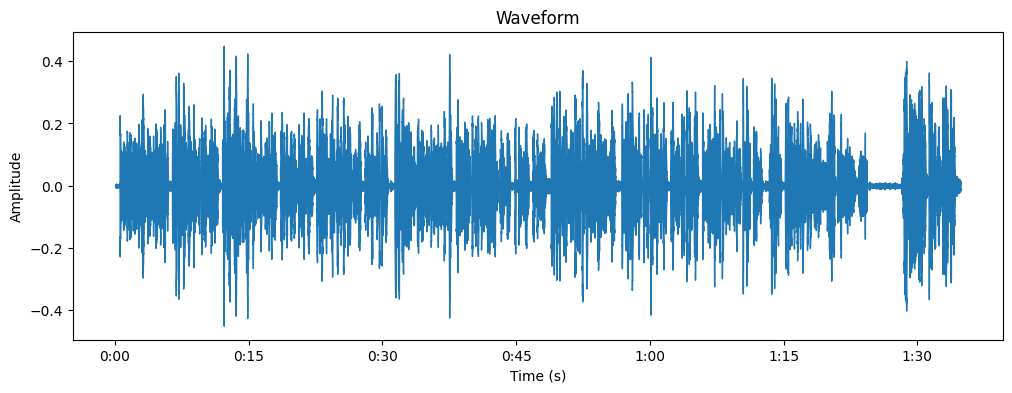

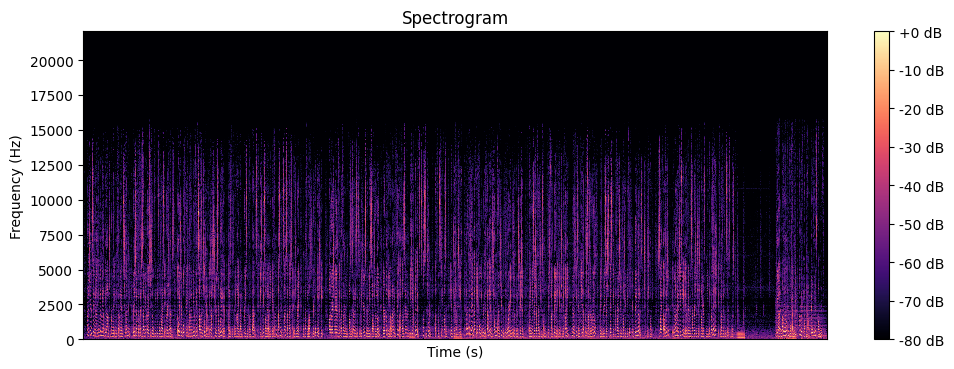

In [ ]:
plt.figure(figsize=(12, 4))
librosa.display.waveshow(y, sr=sr)
plt.title('Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
plt.figure(figsize=(12, 4))
librosa.display.specshow(D, y_axis='linear', sr=sr, hop_length=512)
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.show()

In [ ]:
from scipy import signal

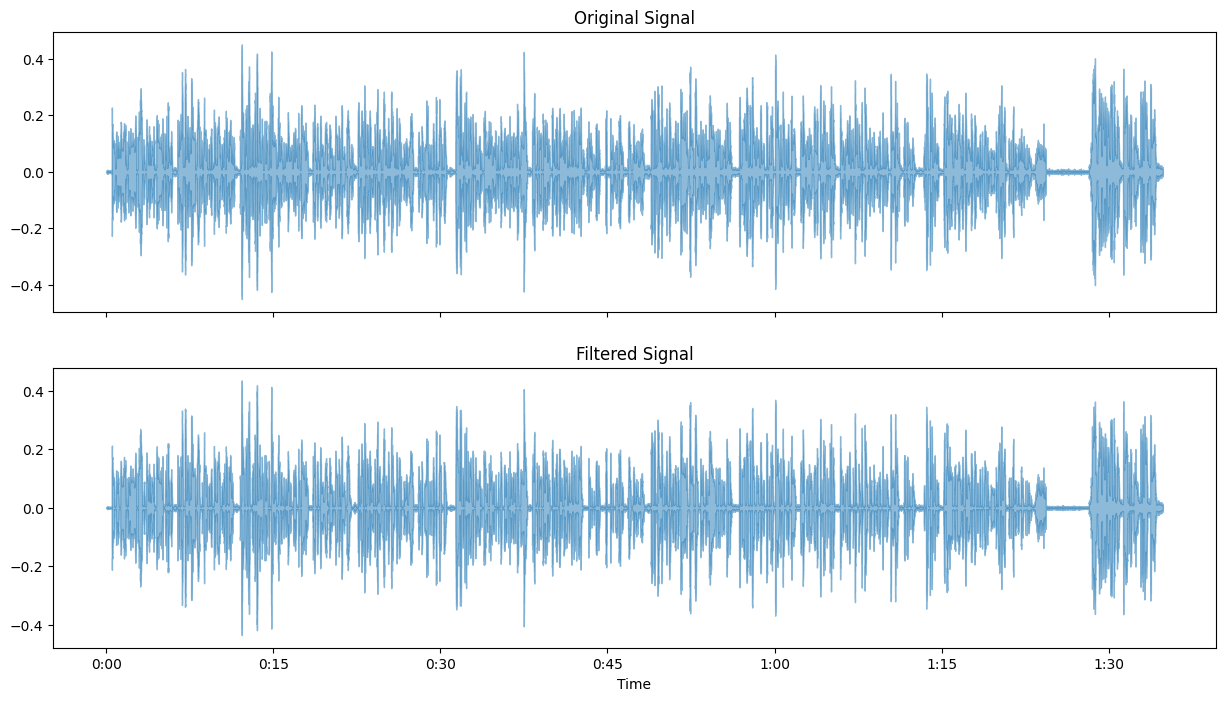

In [ ]:
# Filtering the audio using Butterworth bandpass filter
# Define filter parameters
fmin = 100 # Hz
fmax = 3000 # Hz
order = 4 # Filter order

# Apply Butterworth bandpass filter
nyquist_freq = sr/2
b, a = signal.butter(order, [fmin/nyquist_freq, fmax/nyquist_freq], btype='band')
y_filt = signal.filtfilt(b, a, y)

# Plot the original and filtered signals
fig, ax = plt.subplots(nrows=2, sharex=True, figsize=(15,8))
librosa.display.waveshow(y, sr=sr, ax=ax[0], alpha=0.5)
ax[0].set(title='Original Signal')
ax[0].label_outer()
librosa.display.waveshow(y_filt, sr=sr, ax=ax[1], alpha=0.5)
ax[1].set(title='Filtered Signal')
ax[1].label_outer()

In [ ]:
Audio(y_filt, rate=sr)

In [ ]:
# Normalize audio
audio_norm = librosa.util.normalize(y_filt)

In [ ]:
Audio(audio_norm, rate=sr)

In [ ]:
import soundfile as sf

In [ ]:
norm_audio_path = '/content/drive/MyDrive/Colab Notebooks/norm_audio.wav'
# # sr = librosa.get_samplerate('/content/drive/MyDrive/Colab Notebooks/filtered_audio.wav')
sf.write(norm_audio_path, audio_norm, sr)

In [ ]:
!pip install SpeechRecognition

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 39.0 MB/s eta 0:00:00


In [ ]:
import speech_recognition as sr

audio_path = "/content/drive/MyDrive/Colab Notebooks/norm_audio.wav"

r = sr.Recognizer()
with sr.AudioFile(audio_path) as source:
    audio = r.record(source)

text = r.recognize_google(audio)
print(text)


foreign students in the United Kingdom may not be allowed to bring the immediate family members to the country but she sent us government does not a new code to deal with the Eightfold rise in emigration numbers according to reports the UK government has and children of international students from joining them and they say study high-value degrees and the government an outline by the UK government must include science mathematics and engineering and a master's degree


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
#Read dataset
news = pd.read_excel("/content/drive/MyDrive/Main_Project/news.xlsx")

In [ ]:
news.head()

,Headline,Short,Source,Time,Publish Date
0,4 ex-bank officials booked for cheating bank o...,The CBI on Saturday booked four former officia...,The New Indian Express,09:25:00,2017-03-26
1,Supreme Court to go paperless in 6 months: CJI,Chief Justice JS Khehar has said the Supreme C...,Outlook,22:18:00,2017-03-25
2,"At least 3 killed, 30 injured in blast in Sylh...","At least three people were killed, including a...",Hindustan Times,23:39:00,2017-03-25
3,Why has Reliance been barred from trading in f...,Mukesh Ambani-led Reliance Industries (RIL) wa...,Livemint,23:08:00,2017-03-25
4,Was stopped from entering my own studio at Tim...,TV news anchor Arnab Goswami has said he was t...,YouTube,23:24:00,2017-03-25


In [ ]:
#Drop unwanted columns
news.drop(['Source ', 'Time ', 'Publish Date'], axis=1, inplace=True)

In [ ]:
news.head()

,Headline,Short
0,4 ex-bank officials booked for cheating bank o...,The CBI on Saturday booked four former officia...
1,Supreme Court to go paperless in 6 months: CJI,Chief Justice JS Khehar has said the Supreme C...
2,"At least 3 killed, 30 injured in blast in Sylh...","At least three people were killed, including a..."
3,Why has Reliance been barred from trading in f...,Mukesh Ambani-led Reliance Industries (RIL) wa...
4,Was stopped from entering my own studio at Tim...,TV news anchor Arnab Goswami has said he was t...


In [ ]:
news.shape

(55104, 2)

In [ ]:
document = news['Short']
summary = news['Headline']

In [ ]:
document[0]

'The CBI on Saturday booked four former officials of Syndicate Bank and six others for cheating, forgery, criminal conspiracy and causing ₹209 crore loss to the state-run bank. The accused had availed home loans and credit from Syndicate Bank on the basis of forged and fabricated documents. These funds were fraudulently transferred to the companies owned by the accused persons.'

In [ ]:
summary[0]

'4 ex-bank officials booked for cheating bank of ₹209 crore'

In [ ]:
#Preprocessing
# for decoder sequence
summary = summary.apply(lambda x: '<go> ' + x + ' <stop>')


In [ ]:
summary.head()

0    <go> 4 ex-bank officials booked for cheating b...
1    <go> Supreme Court to go paperless in 6 months...
2    <go> At least 3 killed, 30 injured in blast in...
3    <go> Why has Reliance been barred from trading...
4    <go> Was stopped from entering my own studio a...
Name: Headline, dtype: object

In [ ]:
#Tokenizing the texts into integer tokens
# since < and > from default tokens cannot be removed
filters = '!"#$%&()*+,-./:;=?@[\\]^_`{|}~\t\n'
oov_token = '<unk>'

In [ ]:
import tensorflow as tf

In [ ]:
document_tokenizer = tf.keras.preprocessing.text.Tokenizer(oov_token=oov_token)
summary_tokenizer = tf.keras.preprocessing.text.Tokenizer(filters=filters, oov_token=oov_token)

In [ ]:
document_tokenizer.fit_on_texts(document)
summary_tokenizer.fit_on_texts(summary)

In [ ]:
inputs = document_tokenizer.texts_to_sequences(document)
targets = summary_tokenizer.texts_to_sequences(summary)

In [ ]:
summary_tokenizer.texts_to_sequences(["This is a test"])

[[184, 22, 12, 71]]

In [ ]:
summary_tokenizer.sequences_to_texts([[184, 22, 12, 71]])

['this is a test']

In [ ]:
encoder_vocab_size = len(document_tokenizer.word_index) + 1
decoder_vocab_size = len(summary_tokenizer.word_index) + 1

# vocab_size
encoder_vocab_size, decoder_vocab_size

(76362, 29661)

In [ ]:
#Obtaining insights on lengths for defining maxlen
document_lengths = pd.Series([len(x) for x in document])
summary_lengths = pd.Series([len(x) for x in summary])

In [ ]:
document_lengths.describe()

count    55104.000000
mean       368.003049
std         26.235510
min        280.000000
25%        350.000000
50%        369.000000
75%        387.000000
max        469.000000
dtype: float64

In [ ]:
summary_lengths.describe()

count    55104.000000
mean        63.620282
std          7.267463
min         20.000000
25%         59.000000
50%         63.000000
75%         69.000000
max         96.000000
dtype: float64

In [ ]:
# maxlen
# taking values > and round figured to 75th percentile
# at the same time not leaving high variance
encoder_maxlen = 400
decoder_maxlen = 75

In [ ]:
#Padding/Truncating sequences for identical sequence lengths
inputs = tf.keras.preprocessing.sequence.pad_sequences(inputs, maxlen=encoder_maxlen, padding='post', truncating='post')
targets = tf.keras.preprocessing.sequence.pad_sequences(targets, maxlen=decoder_maxlen, padding='post', truncating='post')

In [ ]:
#Creating dataset pipeline
inputs = tf.cast(inputs, dtype=tf.int64)
targets = tf.cast(targets, dtype=tf.int64)

In [ ]:
BUFFER_SIZE = 20000
BATCH_SIZE = 64

In [ ]:
dataset = tf.data.Dataset.from_tensor_slices((inputs, targets)).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

In [ ]:
#Positional Encoding for adding notion of position among words as unlike RNN this is non-directional
def get_angles(position, i, d_model):
    angle_rates = 1 / np.power(10000, (2 * (i // 2)) / np.float32(d_model))
    return position * angle_rates

In [ ]:
def positional_encoding(position, d_model):
    angle_rads = get_angles(
        np.arange(position)[:, np.newaxis],
        np.arange(d_model)[np.newaxis, :],
        d_model
    )

    # apply sin to even indices in the array; 2i
    angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])

    # apply cos to odd indices in the array; 2i+1
    angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])

    pos_encoding = angle_rads[np.newaxis, ...]

    return tf.cast(pos_encoding, dtype=tf.float32)


In [ ]:
#Masking
#Padding mask for masking "pad" sequences
#Lookahead mask for masking future words from contributing in prediction of current words in self attention

In [ ]:
def create_padding_mask(seq):
    seq = tf.cast(tf.math.equal(seq, 0), tf.float32)
    return seq[:, tf.newaxis, tf.newaxis, :]

In [ ]:
def create_look_ahead_mask(size):
    mask = 1 - tf.linalg.band_part(tf.ones((size, size)), -1, 0)
    return mask

In [ ]:
#Building the Model

In [ ]:
#Scaled Dot Product
def scaled_dot_product_attention(q, k, v, mask):
    matmul_qk = tf.matmul(q, k, transpose_b=True)

    dk = tf.cast(tf.shape(k)[-1], tf.float32)
    scaled_attention_logits = matmul_qk / tf.math.sqrt(dk)

    if mask is not None:
        scaled_attention_logits += (mask * -1e9)  

    attention_weights = tf.nn.softmax(scaled_attention_logits, axis=-1)

    output = tf.matmul(attention_weights, v)
    return output, attention_weights

In [ ]:
#Multi-Headed Attention
class MultiHeadAttention(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads):
        super(MultiHeadAttention, self).__init__()
        self.num_heads = num_heads
        self.d_model = d_model

        assert d_model % self.num_heads == 0

        self.depth = d_model // self.num_heads

        self.wq = tf.keras.layers.Dense(d_model)
        self.wk = tf.keras.layers.Dense(d_model)
        self.wv = tf.keras.layers.Dense(d_model)

        self.dense = tf.keras.layers.Dense(d_model)
        
    def split_heads(self, x, batch_size):
        x = tf.reshape(x, (batch_size, -1, self.num_heads, self.depth))
        return tf.transpose(x, perm=[0, 2, 1, 3])
    
    def call(self, v, k, q, mask):
        batch_size = tf.shape(q)[0]

        q = self.wq(q)
        k = self.wk(k)
        v = self.wv(v)

        q = self.split_heads(q, batch_size)
        k = self.split_heads(k, batch_size)
        v = self.split_heads(v, batch_size)

        scaled_attention, attention_weights = scaled_dot_product_attention(
            q, k, v, mask)

        scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])

        concat_attention = tf.reshape(scaled_attention, (batch_size, -1, self.d_model))
        output = self.dense(concat_attention)
            
        return output, attention_weights

In [ ]:
#Feed Forward Network
def point_wise_feed_forward_network(d_model, dff):
    return tf.keras.Sequential([
        tf.keras.layers.Dense(dff, activation='relu'),
        tf.keras.layers.Dense(d_model)
    ])

In [ ]:
#Fundamental Unit of Transformer encoder
class EncoderLayer(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads, dff, rate=0.1):
        super(EncoderLayer, self).__init__()

        self.mha = MultiHeadAttention(d_model, num_heads)
        self.ffn = point_wise_feed_forward_network(d_model, dff)

        self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)

        self.dropout1 = tf.keras.layers.Dropout(rate)
        self.dropout2 = tf.keras.layers.Dropout(rate)
    
    def call(self, x, training, mask):
        attn_output, _ = self.mha(x, x, x, mask)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(x + attn_output)

        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        out2 = self.layernorm2(out1 + ffn_output)

        return out2


In [ ]:
#Fundamental Unit of Transformer decoder
class DecoderLayer(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads, dff, rate=0.1):
        super(DecoderLayer, self).__init__()

        self.mha1 = MultiHeadAttention(d_model, num_heads)
        self.mha2 = MultiHeadAttention(d_model, num_heads)

        self.ffn = point_wise_feed_forward_network(d_model, dff)

        self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.layernorm3 = tf.keras.layers.LayerNormalization(epsilon=1e-6)

        self.dropout1 = tf.keras.layers.Dropout(rate)
        self.dropout2 = tf.keras.layers.Dropout(rate)
        self.dropout3 = tf.keras.layers.Dropout(rate)
    
    
    def call(self, x, enc_output, training, look_ahead_mask, padding_mask):
        attn1, attn_weights_block1 = self.mha1(x, x, x, look_ahead_mask)
        attn1 = self.dropout1(attn1, training=training)
        out1 = self.layernorm1(attn1 + x)

        attn2, attn_weights_block2 = self.mha2(enc_output, enc_output, out1, padding_mask)
        attn2 = self.dropout2(attn2, training=training)
        out2 = self.layernorm2(attn2 + out1)

        ffn_output = self.ffn(out2)
        ffn_output = self.dropout3(ffn_output, training=training)
        out3 = self.layernorm3(ffn_output + out2)

        return out3, attn_weights_block1, attn_weights_block2


In [ ]:
#Encoder consisting of multiple EncoderLayer(s)
class Encoder(tf.keras.layers.Layer):
    def __init__(self, num_layers, d_model, num_heads, dff, input_vocab_size, maximum_position_encoding, rate=0.1):
        super(Encoder, self).__init__()

        self.d_model = d_model
        self.num_layers = num_layers

        self.embedding = tf.keras.layers.Embedding(input_vocab_size, d_model)
        self.pos_encoding = positional_encoding(maximum_position_encoding, self.d_model)

        self.enc_layers = [EncoderLayer(d_model, num_heads, dff, rate) for _ in range(num_layers)]

        self.dropout = tf.keras.layers.Dropout(rate)
        
    def call(self, x, training, mask):
        seq_len = tf.shape(x)[1]

        x = self.embedding(x)
        x *= tf.math.sqrt(tf.cast(self.d_model, tf.float32))
        x += self.pos_encoding[:, :seq_len, :]

        x = self.dropout(x, training=training)
    
        for i in range(self.num_layers):
            x = self.enc_layers[i](x, training, mask)
    
        return x


In [ ]:
#Decoder consisting of multiple DecoderLayer(s)
class Decoder(tf.keras.layers.Layer):
    def __init__(self, num_layers, d_model, num_heads, dff, target_vocab_size, maximum_position_encoding, rate=0.1):
        super(Decoder, self).__init__()

        self.d_model = d_model
        self.num_layers = num_layers

        self.embedding = tf.keras.layers.Embedding(target_vocab_size, d_model)
        self.pos_encoding = positional_encoding(maximum_position_encoding, d_model)

        self.dec_layers = [DecoderLayer(d_model, num_heads, dff, rate) for _ in range(num_layers)]
        self.dropout = tf.keras.layers.Dropout(rate)
    
    def call(self, x, enc_output, training, look_ahead_mask, padding_mask):
        seq_len = tf.shape(x)[1]
        attention_weights = {}

        x = self.embedding(x)
        x *= tf.math.sqrt(tf.cast(self.d_model, tf.float32))
        x += self.pos_encoding[:, :seq_len, :]

        x = self.dropout(x, training=training)

        for i in range(self.num_layers):
            x, block1, block2 = self.dec_layers[i](x, enc_output, training, look_ahead_mask, padding_mask)

            attention_weights['decoder_layer{}_block1'.format(i+1)] = block1
            attention_weights['decoder_layer{}_block2'.format(i+1)] = block2
    
        return x, attention_weights


In [ ]:
#Finally, the Transformer
class Transformer(tf.keras.Model):
    def __init__(self, num_layers, d_model, num_heads, dff, input_vocab_size, target_vocab_size, pe_input, pe_target, rate=0.1):
        super(Transformer, self).__init__()

        self.encoder = Encoder(num_layers, d_model, num_heads, dff, input_vocab_size, pe_input, rate)

        self.decoder = Decoder(num_layers, d_model, num_heads, dff, target_vocab_size, pe_target, rate)

        self.final_layer = tf.keras.layers.Dense(target_vocab_size)
    
    def call(self, inp, tar, training, enc_padding_mask, look_ahead_mask, dec_padding_mask):
        enc_output = self.encoder(inp, training, enc_padding_mask)

        dec_output, attention_weights = self.decoder(tar, enc_output, training, look_ahead_mask, dec_padding_mask)

        final_output = self.final_layer(dec_output)

        return final_output, attention_weights


In [ ]:
#Training
# hyper-params
num_layers = 4
d_model = 128
dff = 512
num_heads = 8
EPOCHS = 30

In [ ]:
# #Adam optimizer with custom learning rate scheduling
# class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):
#     def __init__(self, d_model, warmup_steps=4000):
#         super(CustomSchedule, self).__init__()

#         self.d_model = d_model
#         self.d_model = tf.cast(self.d_model, tf.float32)

#         self.warmup_steps = warmup_steps
    
#     def __call__(self, step):
#         arg1 = tf.math.rsqrt(step)
#         arg2 = step * (self.warmup_steps ** -1.5)

#         return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)


In [ ]:
#Adam optimizer with custom learning rate scheduling
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):
    def __init__(self, d_model, warmup_steps=4000):
        super(CustomSchedule, self).__init__()

        self.d_model = d_model
        self.d_model = tf.cast(self.d_model, tf.float32)

        self.warmup_steps = warmup_steps
    
    def __call__(self, step):
        step = tf.cast(step, tf.float32)  # Cast the step variable to float32
        arg1 = tf.math.rsqrt(step)
        arg2 = step * (self.warmup_steps ** -1.5)

        return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)


In [ ]:
#Defining losses and other metrics
learning_rate = CustomSchedule(d_model)
# learning_rate = 0.001
optimizer = tf.keras.optimizers.Adam(learning_rate, beta_1=0.9, beta_2=0.98, epsilon=1e-9)

In [ ]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True, reduction='none')

In [ ]:
def loss_function(real, pred):
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    loss_ = loss_object(real, pred)

    mask = tf.cast(mask, dtype=loss_.dtype)
    loss_ *= mask

    return tf.reduce_sum(loss_)/tf.reduce_sum(mask)

def accuracy_function(real, pred):
  accuracies = tf.equal(real, tf.argmax(pred, axis=2))

  mask = tf.math.logical_not(tf.math.equal(real, 0))
  accuracies = tf.math.logical_and(mask, accuracies)

  accuracies = tf.cast(accuracies, dtype=tf.float32)
  mask = tf.cast(mask, dtype=tf.float32)
  return tf.reduce_sum(accuracies)/tf.reduce_sum(mask)    


In [ ]:
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.Mean(name='train_accuracy')

In [ ]:
transformer = Transformer(
    num_layers, 
    d_model, 
    num_heads, 
    dff,
    encoder_vocab_size, 
    decoder_vocab_size, 
    pe_input=encoder_vocab_size, 
    pe_target=decoder_vocab_size,
)

In [ ]:
#Masks
def create_masks(inp, tar):
    enc_padding_mask = create_padding_mask(inp)
    dec_padding_mask = create_padding_mask(inp)

    look_ahead_mask = create_look_ahead_mask(tf.shape(tar)[1])
    dec_target_padding_mask = create_padding_mask(tar)
    combined_mask = tf.maximum(dec_target_padding_mask, look_ahead_mask)
  
    return enc_padding_mask, combined_mask, dec_padding_mask


In [ ]:
#Checkpoints
checkpoint_path = "checkpoints"

ckpt = tf.train.Checkpoint(transformer=transformer, optimizer=optimizer)

ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=5)

if ckpt_manager.latest_checkpoint:
    ckpt.restore(ckpt_manager.latest_checkpoint)
    print ('Latest checkpoint restored!!')

In [ ]:
#Training steps
@tf.function
def train_step(inp, tar):
    tar_inp = tar[:, :-1]
    tar_real = tar[:, 1:]

    enc_padding_mask, combined_mask, dec_padding_mask = create_masks(inp, tar_inp)

    with tf.GradientTape() as tape:
        predictions, _ = transformer(
            inp, tar_inp, 
            True, 
            enc_padding_mask, 
            combined_mask, 
            dec_padding_mask
        )
        loss = loss_function(tar_real, predictions)

    gradients = tape.gradient(loss, transformer.trainable_variables)    
    optimizer.apply_gradients(zip(gradients, transformer.trainable_variables))

    train_loss(loss)
    train_accuracy(accuracy_function(tar_real, predictions))

In [ ]:
import time

In [ ]:
for epoch in range(EPOCHS):
    start = time.time()

    train_loss.reset_states()
  
    for (batch, (inp, tar)) in enumerate(dataset):
        train_step(inp, tar)
    
        # 55k samples
        # we display 3 batch results -- 0th, middle and last one (approx)
        # 55k / 64 ~ 858; 858 / 2 = 429
        if batch % 429 == 0:
            print(f'Epoch {epoch + 1} Batch {batch} Loss {train_loss.result():.4f} Accuracy {train_accuracy.result():.4f}')
      
    if (epoch + 1) % 5 == 0:
        ckpt_save_path = ckpt_manager.save()
        print ('Saving checkpoint for epoch {} at {}'.format(epoch+1, ckpt_save_path))
    
    print(f'Epoch {epoch + 1} Loss {train_loss.result():.4f} Accuracy {train_accuracy.result():.4f}')

    print ('Time taken for 1 epoch: {} secs\n'.format(time.time() - start))


Epoch 1 Batch 0 Loss 5.9477 Accuracy 0.1490
Epoch 1 Batch 429 Loss 5.8144 Accuracy 0.1595
Epoch 1 Batch 858 Loss 5.7434 Accuracy 0.1701
Epoch 1 Loss 5.7434 Accuracy 0.1701
Time taken for 1 epoch: 343.5152311325073 secs

Epoch 2 Batch 0 Loss 5.5240 Accuracy 0.1701
Epoch 2 Batch 429 Loss 5.4049 Accuracy 0.1788
Epoch 2 Batch 858 Loss 5.3347 Accuracy 0.1880
Epoch 2 Loss 5.3347 Accuracy 0.1880
Time taken for 1 epoch: 342.5037078857422 secs

Epoch 3 Batch 0 Loss 5.0990 Accuracy 0.1880
Epoch 3 Batch 429 Loss 5.0503 Accuracy 0.1956
Epoch 3 Batch 858 Loss 4.9837 Accuracy 0.2041
Epoch 3 Loss 4.9835 Accuracy 0.2041
Time taken for 1 epoch: 342.1797831058502 secs

Epoch 4 Batch 0 Loss 4.9053 Accuracy 0.2041
Epoch 4 Batch 429 Loss 4.6725 Accuracy 0.2119
Epoch 4 Batch 858 Loss 4.6100 Accuracy 0.2201
Epoch 4 Loss 4.6095 Accuracy 0.2202
Time taken for 1 epoch: 342.4253613948822 secs

Epoch 5 Batch 0 Loss 4.4131 Accuracy 0.2202
Epoch 5 Batch 429 Loss 4.3291 Accuracy 0.2280
Epoch 5 Batch 858 Loss 4.2957 

In [ ]:
import pickle

In [ ]:
# Save the weights of the model
transformer.save_weights('/content/drive/MyDrive/Main_Project/trans_weights')


In [ ]:
# load the saved weights into the model
transformer.load_weights('/content/drive/MyDrive/Main_Project/trans_weights')

In [ ]:
#Inference
#Predicting one word at a time at the decoder and appending it to the output; then taking the complete sequence as an input to the decoder and repeating until maxlen or stop keyword appears

In [ ]:
def evaluate(input_document):
    input_document = document_tokenizer.texts_to_sequences([input_document])
    input_document = tf.keras.preprocessing.sequence.pad_sequences(input_document, maxlen=encoder_maxlen, padding='post', truncating='post')

    encoder_input = tf.expand_dims(input_document[0], 0)

    decoder_input = [summary_tokenizer.word_index["<go>"]]
    output = tf.expand_dims(decoder_input, 0)
    
    for i in range(decoder_maxlen):
        enc_padding_mask, combined_mask, dec_padding_mask = create_masks(encoder_input, output)

        predictions, attention_weights = transformer(
            encoder_input, 
            output,
            False,
            enc_padding_mask,
            combined_mask,
            dec_padding_mask
        )

        predictions = predictions[: ,-1:, :]
        predicted_id = tf.cast(tf.argmax(predictions, axis=-1), tf.int32)

        if predicted_id == summary_tokenizer.word_index["<stop>"]:
            return tf.squeeze(output, axis=0), attention_weights

        output = tf.concat([output, predicted_id], axis=-1)

    return tf.squeeze(output, axis=0), attention_weights


In [ ]:
def summarize(input_document):
    # not considering attention weights for now, can be used to plot attention heatmaps in the future
    summarized = evaluate(input_document=input_document)[0].numpy()
    summarized = np.expand_dims(summarized[1:], 0)  # not printing <go> token
    return summary_tokenizer.sequences_to_texts(summarized)[0]  # since there is just one translated document

In [ ]:
for i in range(10):
 print("generated summary:",summarize(document[i]))

generated summary: 4 ex government employees booked for taking bribe
generated summary: hc upholds 25 quota in next among states
generated summary: at least 10 killed in blast at mosque in africa
generated summary: what has the impact of amazon over ₹1 500 crore
generated summary: i am a mumbai had plans to enter the media johar
generated summary: new trailer of 39 justice league 39 released
generated summary: 39 i told me to do not know who said bharat 39
generated summary: anti nationals should be shut up cm on jat protest
generated summary: there is no development of four 000 delhi police
generated summary: 25 injured in stampede at indo pak express


In [ ]:
#Evaluation metric ROUGE score
!pip install rouge

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from rouge import Rouge
ROUGE = Rouge()

In [ ]:
gen="4 ex government employees booked for taking bribe"
org="4 ex-bank officials booked for cheating bank of ₹209 crore"

In [ ]:
ROUGE.get_scores(gen,org)

[{'rouge-1': {'r': 0.3, 'p': 0.375, 'f': 0.33333332839506175},
  'rouge-2': {'r': 0.1111111111111111,
   'p': 0.14285714285714285,
   'f': 0.12499999507812519},
  'rouge-l': {'r': 0.3, 'p': 0.375, 'f': 0.33333332839506175}}]

In [ ]:
# Load the tokenizer and model
import pickle

# with open('/content/drive/MyDrive/Main_Project/enc_tokenizer.pickle', 'wb') as handle:
#     pickle.dump(document_tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('/content/drive/MyDrive/Main_Project/enc_tokenizer.pickle', 'rb') as handle:
    enc_tokenizer = pickle.load(handle)

# with open('/content/drive/MyDrive/Main_Project/dec_tokenizer.pickle', 'wb') as handle:
#     pickle.dump(summary_tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('/content/drive/MyDrive/Main_Project/dec_tokenizer.pickle', 'rb') as handle:
    dec_tokenizer = pickle.load(handle)

transformer = Transformer(
    num_layers, 
    d_model, 
    num_heads, 
    dff,
    len(enc_tokenizer.word_index)+1, 
    len(dec_tokenizer.word_index)+1, 
    pe_input=len(enc_tokenizer.word_index)+1, 
    pe_target=len(dec_tokenizer.word_index)+1,
)

transformer.load_weights('/content/drive/MyDrive/Main_Project/trans_weights')

# Get user input and preprocess it
input_document = "Enter your input here"
input_document = enc_tokenizer.texts_to_sequences([input_document])
input_document = tf.keras.preprocessing.sequence.pad_sequences(input_document, maxlen=encoder_maxlen, padding='post', truncating='post')

# Generate a response
start_token = tf.constant([dec_tokenizer.word_index['<start>']]*BATCH_SIZE, dtype=tf.int32)
end_token = tf.constant([dec_tokenizer.word_index['<end>']]*BATCH_SIZE, dtype=tf.int32)

decoder_input = tf.expand_dims(tf.ones_like(start_token) * start_token, 1) # batch_size x 1
target_seq_len = decoder_maxlen
decoder_input = tf.reshape(decoder_input, (BATCH_SIZE, 1, 1))  # reshape decoder_input to match the desired shape for concatenation
decoder_input = tf.concat([decoder_input, tf.zeros((BATCH_SIZE, target_seq_len-1), dtype=tf.int32)[:, :, tf.newaxis]], axis=1) # batch_size x target_seq_len x 1




for i in range(decoder_maxlen):
    enc_padding_mask, combined_mask, dec_padding_mask = create_masks(input_document, decoder_input)

    predictions, attention_weights = transformer(
        input_document, 
        decoder_input, 
        False, 
        enc_padding_mask, 
        combined_mask, 
        dec_padding_mask
    )

    # Get the last predicted token
    predicted_token = tf.argmax(predictions[:, -1, :], axis=-1)

    # Exit loop if predicted token is the end token
    if tf.reduce_all(tf.equal(predicted_token, end_token)):
        break

    # Add predicted token to decoder input
    decoder_input = tf.concat([decoder_input, tf.cast(predicted_token[:, tf.newaxis], dtype=tf.int32)], axis=-1)

response = dec_tokenizer.sequences_to_texts(decoder_input.numpy())[0]
print(response)


ValueError: ignored

In [ ]:

print(decoder_input.shape) # print the shape of decoder_input


(1, 1)


In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 85.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 107.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 29.7 MB/s eta 0:00:00


In [ ]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 77.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.5/140.5 kB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.3/75.3 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 57.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.2/286.2 kB 30.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.8/57.8 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.7/129.7 kB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 

In [ ]:
# import gradio as gr
from transformers import pipeline

In [ ]:
# load the saved weights into the model
transformer.load_weights('/content/drive/MyDrive/Main_Project/trans_weights')

In [ ]:
def doAbstractiveSummary(text):
    pp=pipeline('summarization')
    output=pp(text,max_length=400,min_length=20,do_sample=False)
    return output

   

In [ ]:
summarization = pipeline("summarization")

original_text = text
summary_text = summarization(original_text)[0]['summary_text']


No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


Your max_length is set to 142, but you input_length is only 85. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=42)


In [ ]:
print(text)

foreign students in the United Kingdom may not be allowed to bring the immediate family members to the country but she sent us government does not a new code to deal with the Eightfold rise in emigration numbers according to reports the UK government has and children of international students from joining them and they say study high-value degrees and the government an outline by the UK government must include science mathematics and engineering and a master's degree


In [ ]:
print(summary_text)

 The UK government does not a new code to deal with the Eightfold rise in emigration numbers according to reports the UK government has and children of international students from joining them . They say study high-value degrees must include science mathematics and engineering and a master's degree .


In [ ]:
from moviepy.editor import *
import librosa
import librosa.display
import speech_recognition as sr
import gradio as gr
from transformers import pipeline
from scipy import signal
import soundfile as sf
import tensorflow as tf

def summarizer(video_path):
    
    # Load the video file and extract the audio
    video = VideoFileClip(video_path)
    audio = video.audio
    
    # Load the audio to a file and load it for processing
    audio_path = audio.filename
    y, sr = librosa.load(audio_path, sr=None)
    
    # Define filter parameters
    fmin = 100 # Hz
    fmax = 3000 # Hz
    order = 4 # Filter order

    # Apply Butterworth bandpass filter
    nyquist_freq = sr/2
    b, a = signal.butter(order, [fmin/nyquist_freq, fmax/nyquist_freq], btype='band')
    y_filt = signal.filtfilt(b, a, y)

    # Normalize audio
    audio_norm = librosa.util.normalize(y_filt)

    # Save the normalized audio to a file
    norm_audio_path = '/content/drive/MyDrive/Main_Project/norm_audio.wav'
    sf.write(norm_audio_path, audio_norm, sr)

    # Recognize the text from the audio using Google Speech Recognition API
    audio_path = "/content/drive/MyDrive/Main_Project/norm_audio.wav"
    r = sr.Recognizer()
    with sr.AudioFile(audio_path) as source:
        audio = r.record(source)
    text = r.recognize_google(audio)

    # Generate summary using summarization model
    summarization = pipeline("summarization")
    summary_text = summarization(text, max_length=400, min_length=20, do_sample=False)[0]['summary_text']

    # Display the summary
    print("Original Text:")
    print(text)
    print("\nSummary:")
    print(summary_text)

    # Return the summary text
    return summary_text

# Define the Gradio interface
inputs = gr.inputs.Textbox(label="Enter the path of the video file")
outputs = gr.outputs.Textbox(label="Summary")
title = "Video Summarization"
description = "You can get the summary of the video here..."

gr.Interface(fn=summarizer, inputs=inputs, outputs=outputs, title=title, description=description).launch()


  warnings.warn(

  warnings.warn(value)

  warnings.warn(value)

  warnings.warn(



Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>